In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
engine.execute('SELECT max(date), min(date) FROM Measurement').fetchall()

[('2017-08-23', '2010-01-01')]

In [11]:
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
prcpLastYear = engine.execute('SELECT date, prcp FROM Measurement where date > "2016-08-23" limit 20').fetchall()

In [13]:
df = pd.DataFrame(prcpLastYear, columns=["date", "prcp"])
df.head(5)

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [14]:
prcpLastYear = engine.execute('SELECT date, prcp FROM Measurement where date > "2016-08-23"').fetchall()

In [15]:
df = pd.DataFrame(prcpLastYear, columns=["date", "prcp"])
df.head(5)

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


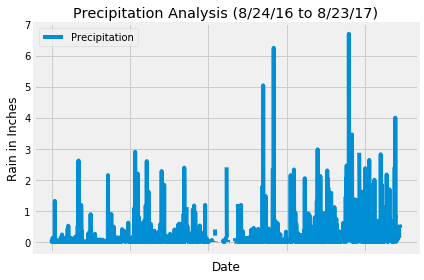

In [16]:
df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Use Pandas to print the summary statistics for the precipitation data.
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(locations))

There are 9 stations.


In [19]:
print(session.query(Measurement).group_by(Measurement.station))

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement GROUP BY measurement.station


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [21]:
busy_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

busiest = busy_station[0][0]    
print("The busiest Station was",busiest,"with",busy_station[0][1],"weather observations.")
print()
print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in busy_station:
    print("Station",station,"had",count, "weather observations.")

The busiest Station was USC00519281 with 2772 weather observations.

Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

In [23]:
lowest_temp = session.query(Measurement.station, func.count(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print(lowest_temp[0])

('USC00519281', 2772, 85.0, 54.0, 71.66378066378067)


In [24]:
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.min(Measurement.tobs).desc()).all()
print(lowest_temp)

[('USC00513117', 59.0), ('USC00514830', 58.0), ('USC00516128', 58.0), ('USC00517948', 58.0), ('USC00518838', 58.0), ('USC00519397', 56.0), ('USC00519523', 56.0), ('USC00519281', 54.0), ('USC00511918', 53.0)]


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [26]:
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest).\
    filter(Measurement.date > "2016-08-23").\
    order_by(Measurement.date).all()
print(temperature)

[('USC00519281', '2016-08-24', 77.0), ('USC00519281', '2016-08-25', 80.0), ('USC00519281', '2016-08-26', 80.0), ('USC00519281', '2016-08-27', 75.0), ('USC00519281', '2016-08-28', 73.0), ('USC00519281', '2016-08-29', 78.0), ('USC00519281', '2016-08-30', 77.0), ('USC00519281', '2016-08-31', 78.0), ('USC00519281', '2016-09-01', 80.0), ('USC00519281', '2016-09-02', 80.0), ('USC00519281', '2016-09-03', 78.0), ('USC00519281', '2016-09-04', 78.0), ('USC00519281', '2016-09-05', 78.0), ('USC00519281', '2016-09-06', 73.0), ('USC00519281', '2016-09-07', 74.0), ('USC00519281', '2016-09-08', 80.0), ('USC00519281', '2016-09-09', 79.0), ('USC00519281', '2016-09-10', 77.0), ('USC00519281', '2016-09-11', 80.0), ('USC00519281', '2016-09-12', 76.0), ('USC00519281', '2016-09-13', 79.0), ('USC00519281', '2016-09-14', 75.0), ('USC00519281', '2016-09-15', 79.0), ('USC00519281', '2016-09-16', 78.0), ('USC00519281', '2016-09-17', 79.0), ('USC00519281', '2016-09-18', 78.0), ('USC00519281', '2016-09-19', 78.0), 

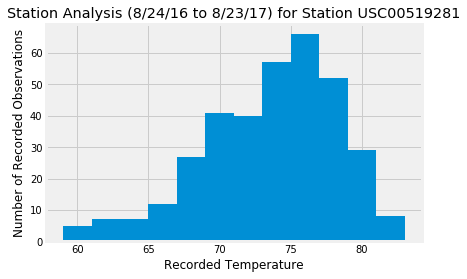

In [27]:
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + busiest)
plt.show()

In [28]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-01', '2012-12-05'))

[(56.0, 72.67628494138864, 86.0)]


In [30]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

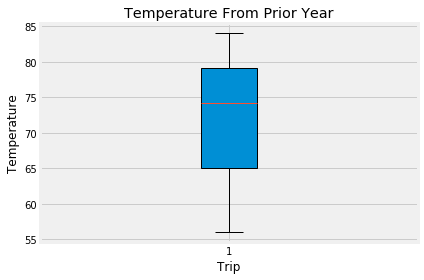

In [29]:
mydata = calc_temps('2016-01-01', '2016-12-31')
fig, ax = plt.subplots()
x = range(len(mydata))
ax.boxplot(mydata, patch_artist=True)
ax.set_title('Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]